<hr style="height:10px"> 
 
<div class='container2'>
		<div>
			<img src='images\header.png' ALIGN='left' style='width:10em'>
		</div>	
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
	<div style="font-size:12pt;float:left;"> 2025/2 | 46M34 | Sala 200 CAE</div><br><br>
    <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial - Preparação, Análise e Predição de Dados </b></div>
	</div>
</div>


 <hr style="height:5px"> 

    
<h2>Projeto - Análise Preditiva de Preços de Imóveis - <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data">House Prices Dataset </a> </h2>

Notebook desenvolvido por: <b>Rubens Rocha Brandão</b>

 <hr style="height:2px">

---
## 1. Bibliotecas Necessárias para o Notebook

Para este projeto, serão utilizadas as seguintes bibliotecas com suas respectivas versões ou superiores:

* [`matplotlib`](https://matplotlib.org/) (versão 3.1.3): para a criação de gráficos.
* [`seaborn`](https://seaborn.pydata.org/) (versão 0.10.0): para visualizações estatísticas mais elaboradas.
* [`numpy`](https://numpy.org) (versão 1.16.2): para manipulação eficiente de vetores e matrizes.
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html) (versão 0.24.1): para manipulação e análise de dados em formato de tabela (DataFrame).
* [`scikit-learn`](https://scikit-learn.org/stable/) (versão 1.0 ou superior): para a construção do modelo de Machine Learning e avaliação de métricas.

In [34]:
import numpy as np
import pandas as pd 


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


sns.set_style("whitegrid")

print('Bibliotecas carregadas com sucesso!')

Bibliotecas carregadas com sucesso!


---
## 2. Carregar e Exibir os Dados da Fonte

O primeiro passo prático é carregar o conjunto de dados do arquivo `train.csv` para um DataFrame do pandas. Em seguida, realizaremos uma inspeção inicial com os métodos `.head()` e `.info()` para entender a estrutura, o formato dos dados e a presença de valores ausentes.

In [2]:
# Importar o arquivo e guardar em um dataframe
df = pd.read_csv('datasets/train.csv')

# Exibir as 5 primeiras linhas para entender a estrutura
print("Amostra dos dados:")
display(df.head())

# Verificar as informações gerais do dataframe (tipos de dados, valores não nulos)
print("\nInformações do DataFrame:")
df.info()

# Verificar o número de linhas e colunas
print(f"\nO dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

Amostra dos dados:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-n

---
## 3. Pré-processamento

Nesta etapa, o objetivo é realizar a limpeza e a preparação dos dados, minimizando ou eliminando problemas que possam impactar a qualidade da análise e do modelo preditivo.

### 3.1 Seleção de atributos (Feature Selection)

O dataset original possui 81 colunas. Para este estudo inicial, selecionamos um subconjunto de atributos numéricos que, por hipótese, possuem maior relevância para a predição do preço de venda (`SalePrice`), simplificando a análise.

In [3]:
colunas_selecionadas = [
    # --- Variáveis Numéricas ---
    'OverallQual',      # Nota da qualidade geral do material e acabamento da casa (1 a 10)
    'GrLivArea',        # Área de estar acima do solo em pés quadrados
    'GarageCars',       # Tamanho da garagem em capacidade de carros
    'TotalBsmtSF',      # Área total do porão em pés quadrados
    'YearBuilt',        # Ano de construção original da casa
    'LotFrontage',      # Comprimento da fachada do lote em pés
    '1stFlrSF',         # Área do primeiro andar em pés quadrados
    'FullBath',         # Número de banheiros completos acima do porão
    'TotRmsAbvGrd',     # Total de cômodos acima do solo (não inclui banheiros)
    
    # --- Variáveis Categóricas (Texto) ---
    'Neighborhood',     # Bairro da cidade de Ames onde o imóvel está localizado
    'HouseStyle',       # Estilo da moradia (ex: 1 andar, 2 andares)
    'BsmtQual',         # Avalia a altura do porão (Excelente, Bom, Típico, Razoável)
    'KitchenQual',      # Qualidade da cozinha (Excelente, Bom, Típico, Razoável)
    'Foundation',       # Tipo de fundação da casa (ex: Concreto, Tijolo)
    'PavedDrive',       # Indica se a entrada da garagem é pavimentada (Sim, Parcial, Não)
    
    # --- Variável Alvo ---
    'SalePrice'         # O preço de venda da propriedade em dólares (o que queremos prever)
]
df_selecionado = df[colunas_selecionadas].copy()

print(f"Colunas selecionadas. O DataFrame agora tem o formato: {df_selecionado.shape}\n")
display(df_selecionado)


Colunas selecionadas. O DataFrame agora tem o formato: (1460, 16)



,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,LotFrontage,1stFlrSF,FullBath,TotRmsAbvGrd,Neighborhood,HouseStyle,BsmtQual,KitchenQual,Foundation,PavedDrive,SalePrice
0,7,1710,2,856,2003,65.0,856,2,8,CollgCr,2Story,Gd,Gd,PConc,Y,208500
1,6,1262,2,1262,1976,80.0,1262,2,6,Veenker,1Story,Gd,TA,CBlock,Y,181500
2,7,1786,2,920,2001,68.0,920,2,6,CollgCr,2Story,Gd,Gd,PConc,Y,223500
3,7,1717,3,756,1915,60.0,961,1,7,Crawfor,2Story,TA,Gd,BrkTil,Y,140000
4,8,2198,3,1145,2000,84.0,1145,2,9,NoRidge,2Story,Gd,Gd,PConc,Y,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,953,1999,62.0,953,2,7,Gilbert,2Story,Gd,TA,PConc,Y,175000
1456,6,2073,2,1542,1978,85.0,2073,2,7,NWAmes,1Story,Gd,TA,CBlock,Y,210000
1457,7,2340,1,1152,1941,66.0,1188,2,9,Crawfor,2Story,TA,Gd,Stone,Y,266500
1458,5,1078,1,1078,1950,68.0,1078,1,5,NAmes,1Story,TA,Gd,CBlock,Y,142125


### 3.2. Tratamento de Valores Ausentes (NaN)
Após a seleção, verificamos e tratamos os dados faltantes. A estratégia foi preencher `LotFrontage` com a mediana, `BsmtQual` com a categoria 'NA' (Não Aplicável), e `GarageCars` e `TotalBsmtSF` com 0, assumindo que a ausência de valor representa a ausência da característica.

In [4]:
print("Valores ausentes ANTES do tratamento:")
print(df_selecionado.isnull().sum().sort_values(ascending=False))

mediana_lot_frontage = df_selecionado['LotFrontage'].median()
df_selecionado['LotFrontage'] = df_selecionado['LotFrontage'].fillna(mediana_lot_frontage)
df_selecionado['BsmtQual'] = df_selecionado['BsmtQual'].fillna('NA')
df_selecionado['GarageCars'] = df_selecionado['GarageCars'].fillna(0)
df_selecionado['TotalBsmtSF'] = df_selecionado['TotalBsmtSF'].fillna(0)

print("\nValores ausentes DEPOIS do tratamento:")
print(df_selecionado.isnull().sum().sort_values(ascending=False))
print("\n")

Valores ausentes ANTES do tratamento:
LotFrontage     259
BsmtQual         37
OverallQual       0
GrLivArea         0
GarageCars        0
TotalBsmtSF       0
YearBuilt         0
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
Neighborhood      0
HouseStyle        0
KitchenQual       0
Foundation        0
PavedDrive        0
SalePrice         0
dtype: int64

Valores ausentes DEPOIS do tratamento:
OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
YearBuilt       0
LotFrontage     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
Neighborhood    0
HouseStyle      0
BsmtQual        0
KitchenQual     0
Foundation      0
PavedDrive      0
SalePrice       0
dtype: int64




### 3.3. Verificação de Dados Duplicados

Devemos verificar se existem registros (linhas) completamente duplicados. Tais registros não adicionam informação nova ao modelo e podem ser removidos.

In [5]:
num_duplicados = df_selecionado.duplicated().sum()
print(f"Número de linhas duplicadas encontradas: {num_duplicados}")
if num_duplicados > 0:
    df_selecionado.drop_duplicates(inplace=True)
    print("Linhas duplicadas foram removidas.")
    print(f"Novo formato do DataFrame: {df_selecionado.shape}\n")
else:
    print("Nenhuma linha duplicada foi encontrada no conjunto de dados.\n")

Número de linhas duplicadas encontradas: 0
Nenhuma linha duplicada foi encontrada no conjunto de dados.



### 3.4. Encoding de Variáveis Categóricas
Para que o modelo de regressão possa processar as colunas de texto (categóricas), utilizamos a técnica de **One-Hot Encoding** com a função `pd.get_dummies`. Isso transforma cada categoria em uma nova coluna binária (0 ou 1)

In [6]:
print("--- Passo 3.4: Convertendo colunas de texto para números (One-Hot Encoding) ---")
df_encoded = pd.get_dummies(df_selecionado, drop_first=True)
print(f"Formato do DataFrame após encoding: {df_encoded.shape}")
print("Novas colunas foram criadas para representar as categorias.\n")

--- Passo 3.4: Convertendo colunas de texto para números (One-Hot Encoding) ---
Formato do DataFrame após encoding: (1460, 55)
Novas colunas foram criadas para representar as categorias.



### 3.5. Detecção e Remoção de Outliers
Identificamos e removemos outliers que poderiam distorcer os resultados do modelo linear, criando assim nosso DataFrame final e tratado.

GrLivArea: 31 outliers removidos


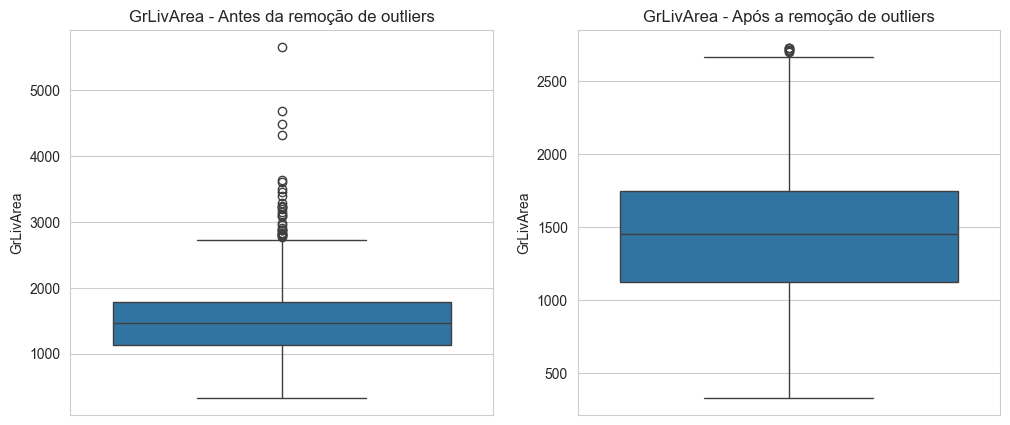

TotalBsmtSF: 62 outliers removidos


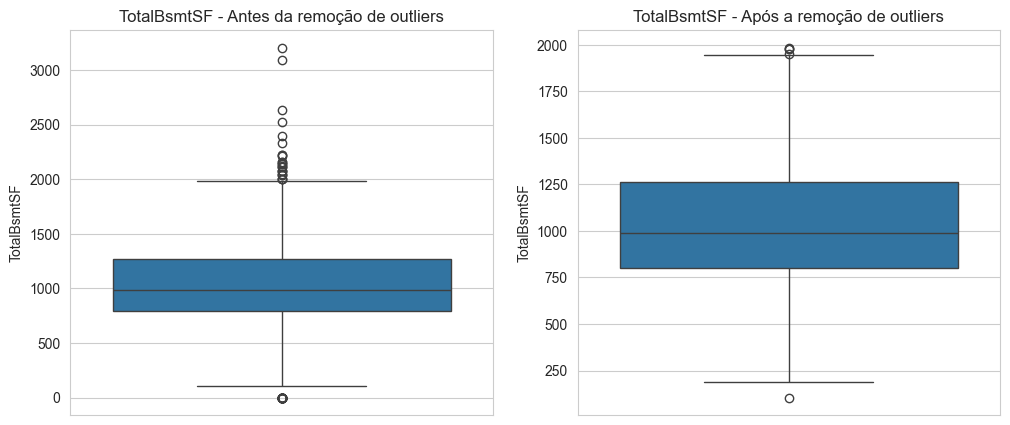

LotFrontage: 107 outliers removidos


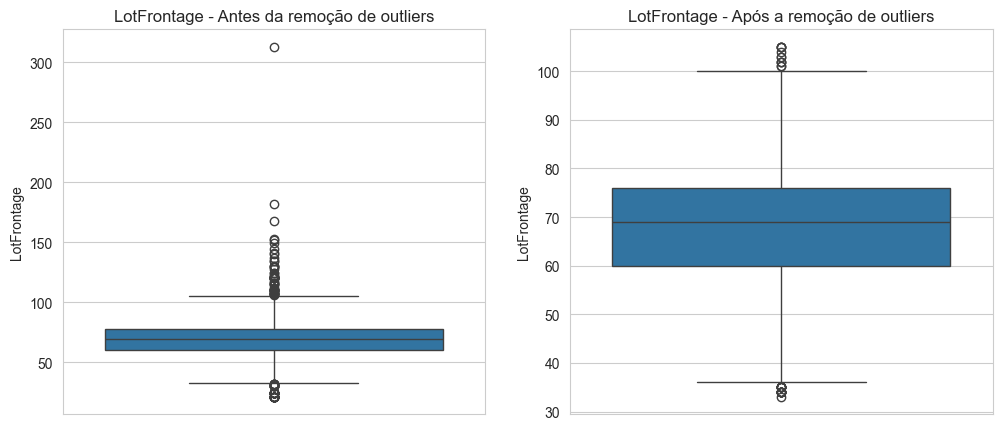

1stFlrSF: 7 outliers removidos


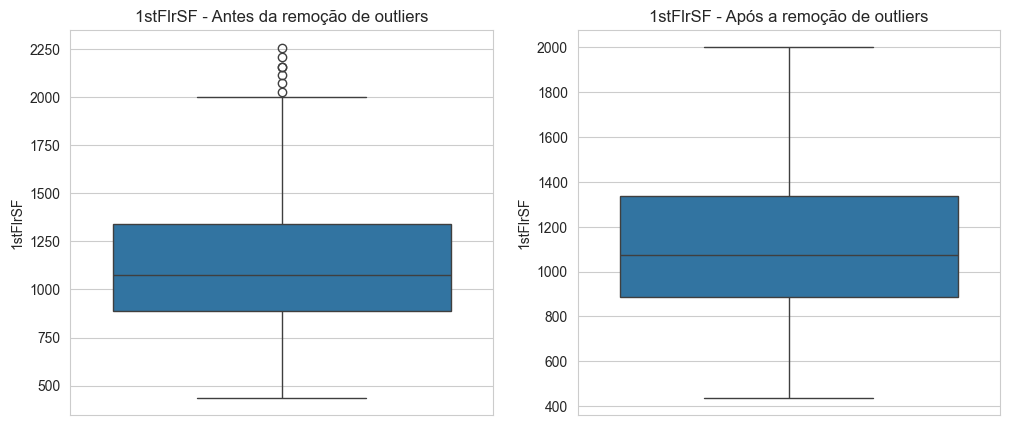

SalePrice: 41 outliers removidos


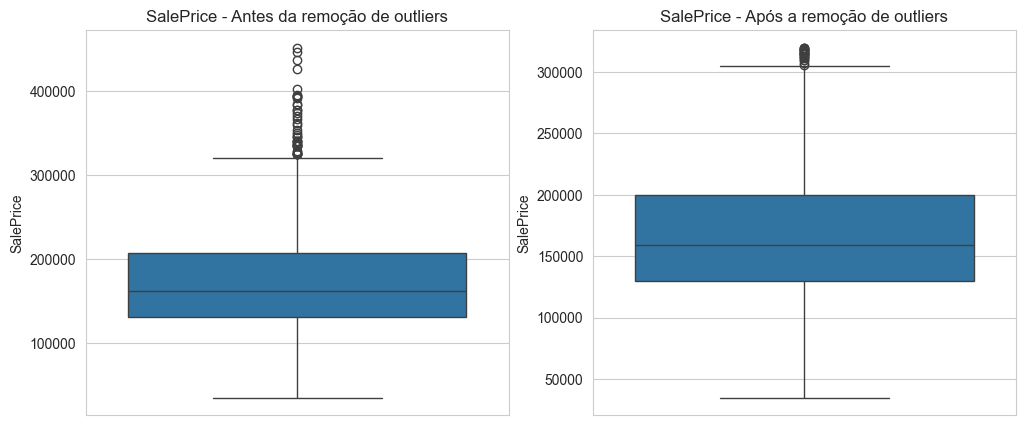

OverallQual: 0 outliers removidos (domínio)


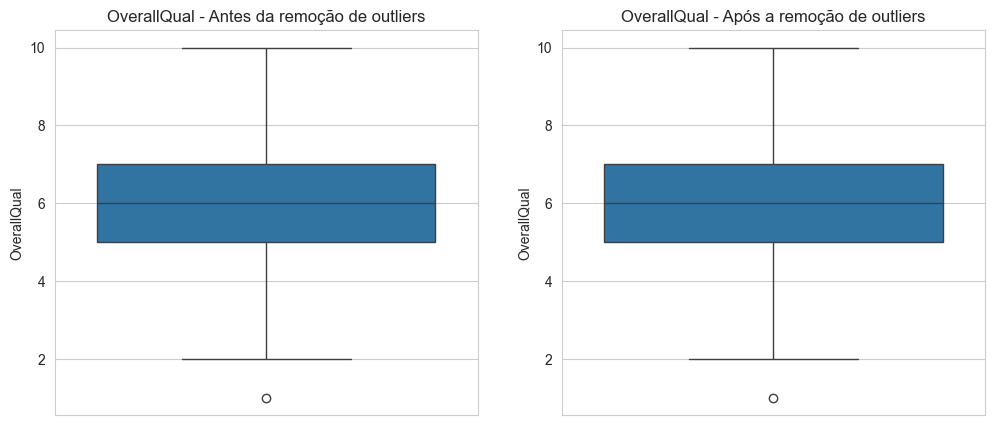

GarageCars: 0 outliers removidos (domínio)


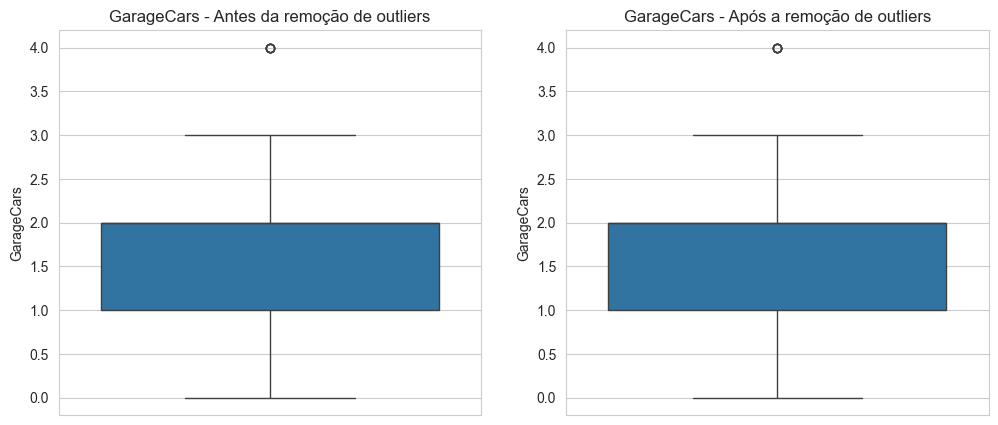

FullBath: 0 outliers removidos (domínio)


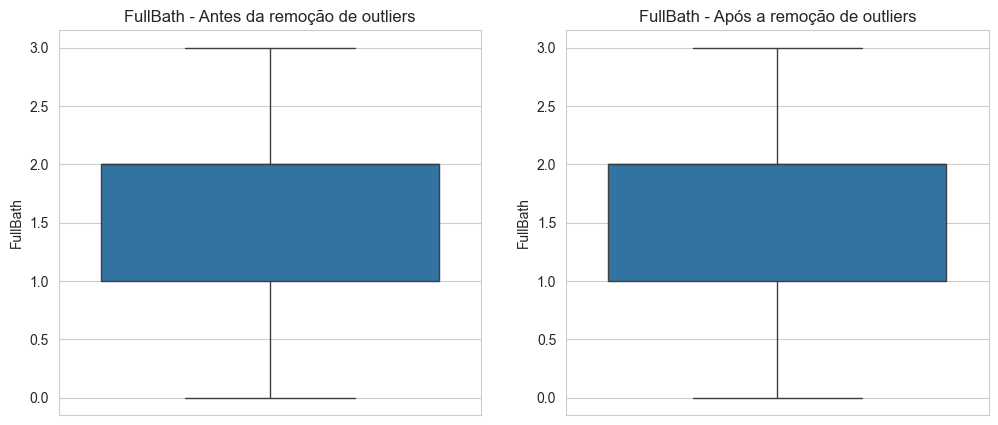

TotRmsAbvGrd: 0 outliers removidos (domínio)


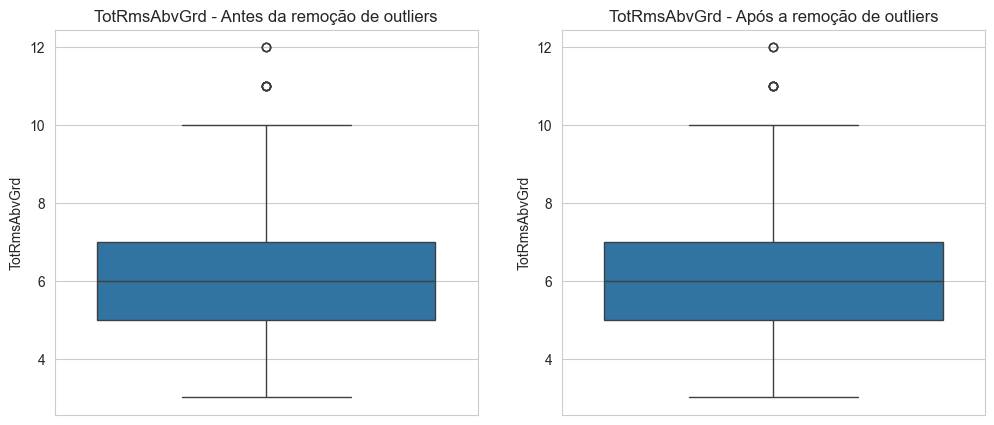


Dimensões finais após remoção de outliers: (1212, 55)


In [10]:
num_cols_iqr = ['GrLivArea', 'TotalBsmtSF', 'LotFrontage', '1stFlrSF', 'SalePrice']

domain_limits = {
    'OverallQual': (1, 10),
    'GarageCars': (0, 6),
    'FullBath': (0, 5),
    'TotRmsAbvGrd': (2, 15)
}

df_tratado = df_encoded.copy()

def plot_before_after(df_before, df_after, col):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.boxplot(y=df_before[col])
    plt.title(f'{col} - Antes da remoção de outliers')
    plt.subplot(1,2,2)
    sns.boxplot(y=df_after[col])
    plt.title(f'{col} - Após a remoção de outliers')
    plt.show()

for col in num_cols_iqr:
    Q1 = df_tratado[col].quantile(0.25)
    Q3 = df_tratado[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    df_before = df_tratado.copy()
    df_tratado = df_tratado[(df_tratado[col] >= lower) & (df_tratado[col] <= upper)]
    print(f"{col}: {df_before.shape[0] - df_tratado.shape[0]} outliers removidos")
    
    plot_before_after(df_before, df_tratado, col)

for col, (min_val, max_val) in domain_limits.items():
    df_before = df_tratado.copy()
    df_tratado = df_tratado[(df_tratado[col] >= min_val) & (df_tratado[col] <= max_val)]
    print(f"{col}: {df_before.shape[0] - df_tratado.shape[0]} outliers removidos (domínio)")
    
    plot_before_after(df_before, df_tratado, col)

print(f"\nDimensões finais após remoção de outliers: {df_tratado.shape}")

---
## 4. Descoberta de Padrões e Tendências </h1>
<p>
Nesta etapa, analisamos os dados limpos para identificar padrões, tendências e relações entre variáveis.
O foco é entender o comportamento do preço de venda em função das variáveis numéricas e categóricas.
</p>

### 4.1 Distribuição do Preço de Venda (SalePrice)
<p>
Visualizamos a distribuição do preço de venda antes e depois da transformação logarítmica.
Isso ajuda a identificar skew e outliers, e prepara o target para modelagem linear.
</p>

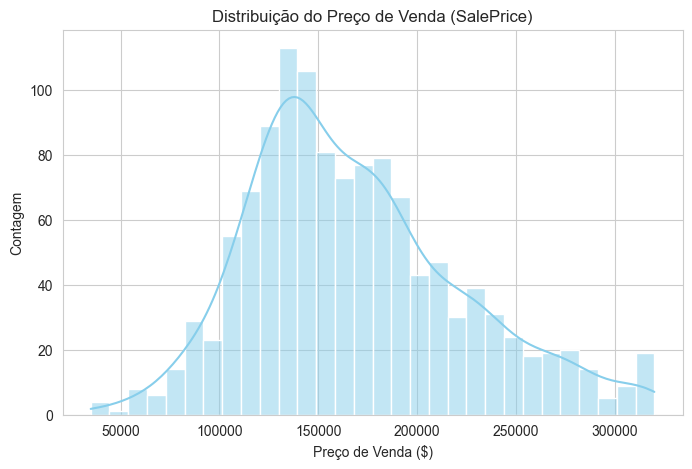

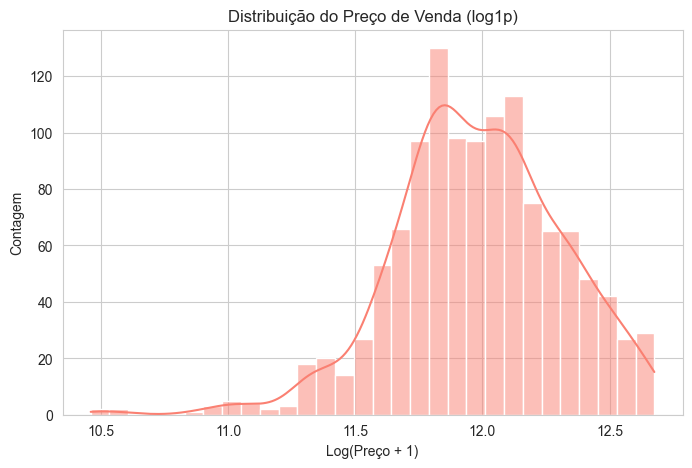

In [12]:
df_eda = df_tratado.copy()
plt.figure(figsize=(8,5))
sns.histplot(df_eda['SalePrice'], bins=30, kde=True, color='skyblue')
plt.title("Distribuição do Preço de Venda (SalePrice)")
plt.xlabel("Preço de Venda ($)")
plt.ylabel("Contagem")
plt.show()

# Log-transform para reduzir skew
import numpy as np
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df_eda['SalePrice']), bins=30, kde=True, color='salmon')
plt.title("Distribuição do Preço de Venda (log1p)")
plt.xlabel("Log(Preço + 1)")
plt.ylabel("Contagem")
plt.show()

### 4.2 Mapa de Correlação</h2>
<p>
Identificamos as variáveis numéricas mais correlacionadas com SalePrice. 
Isso ajuda na escolha de features relevantes e na detecção de multicolinearidade.
</p>

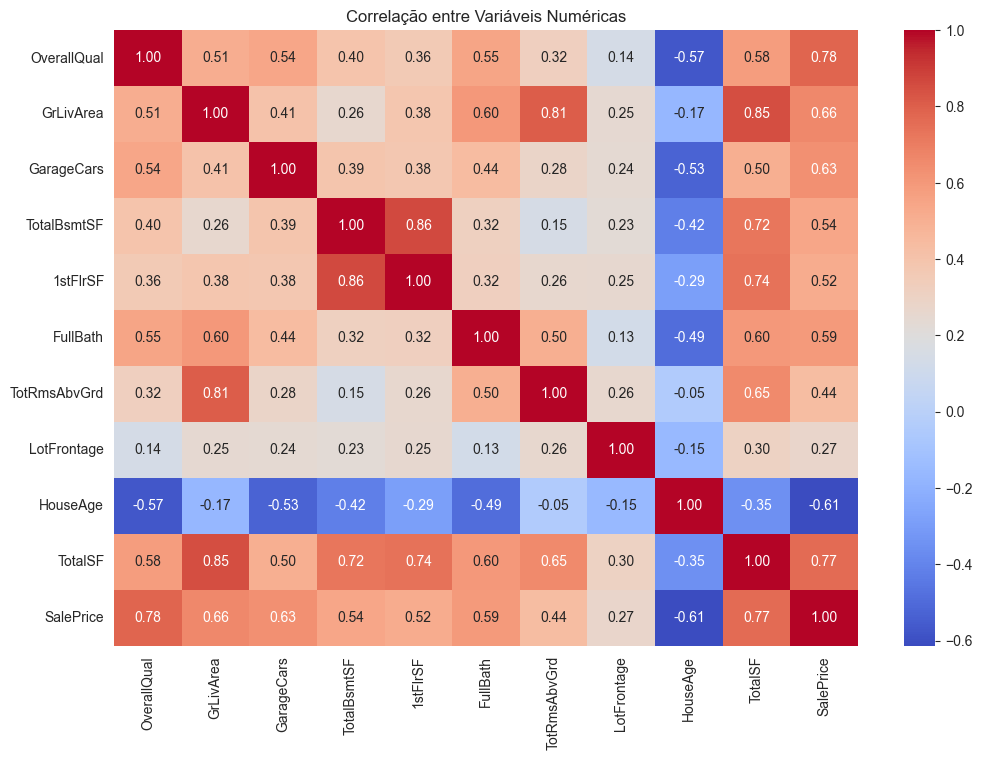

In [16]:
num_cols = ["OverallQual","GrLivArea","GarageCars","TotalBsmtSF",
            "1stFlrSF","FullBath","TotRmsAbvGrd","LotFrontage",
            "HouseAge","TotalSF","SalePrice"]

plt.figure(figsize=(12,8))
sns.heatmap(df_eda[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Variáveis Numéricas")
plt.show()

### 4.3 Impacto das Variáveis Categóricas</h2>
<p>
Usamos boxplots para visualizar como categorias afetam o preço de venda.
Isso evidencia bairros, qualidade geral e qualidade da cozinha como fatores-chave.
</p>

Formato final (com categorias e sem outliers): (1441, 16)


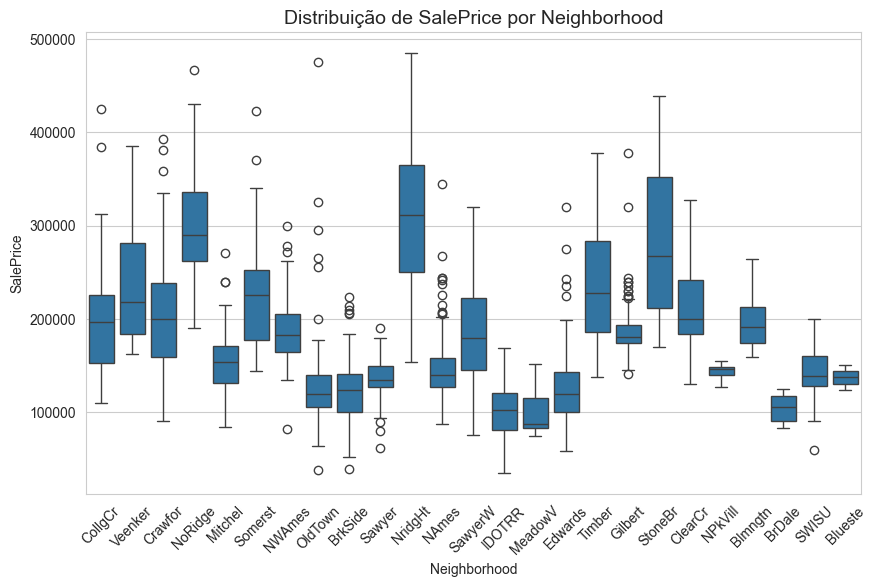

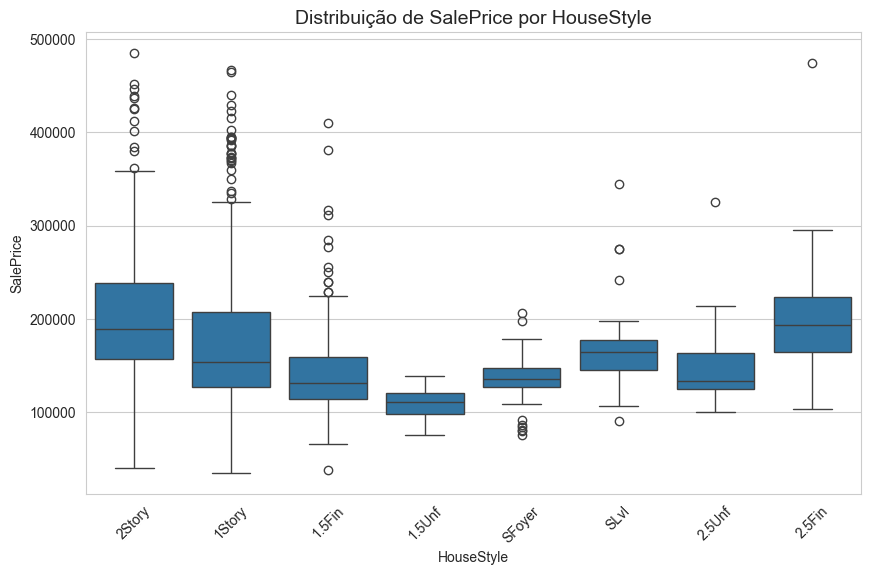

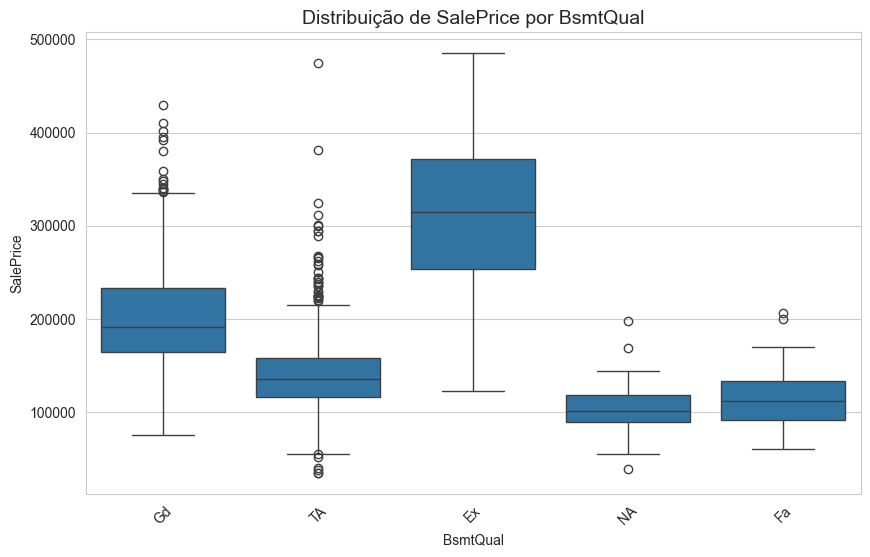

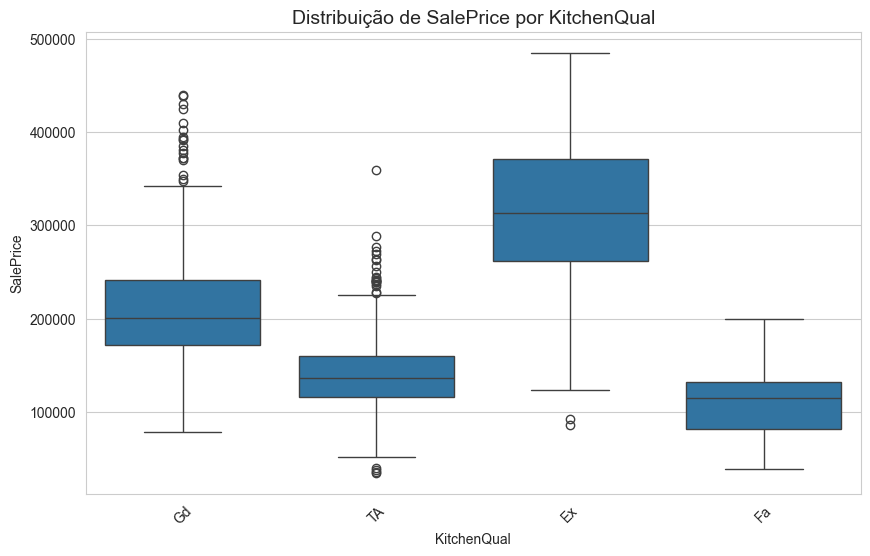

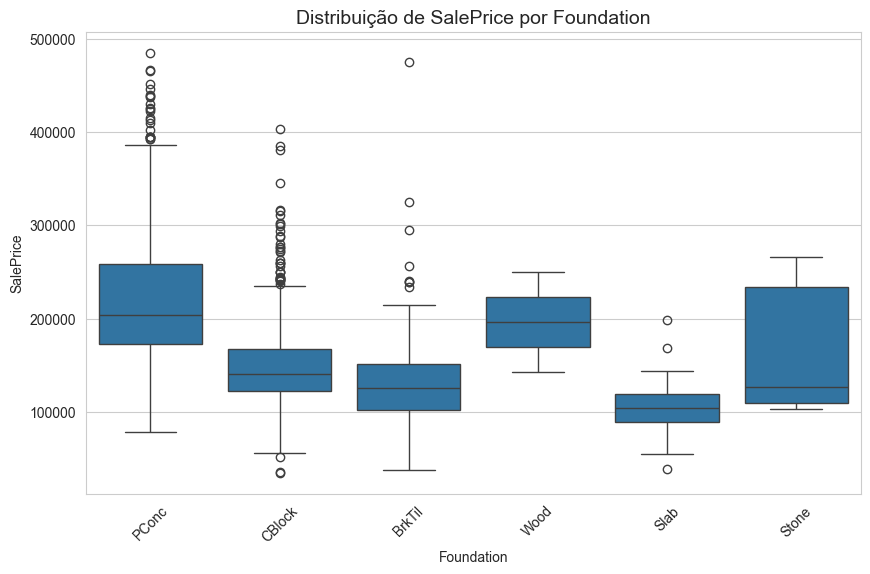

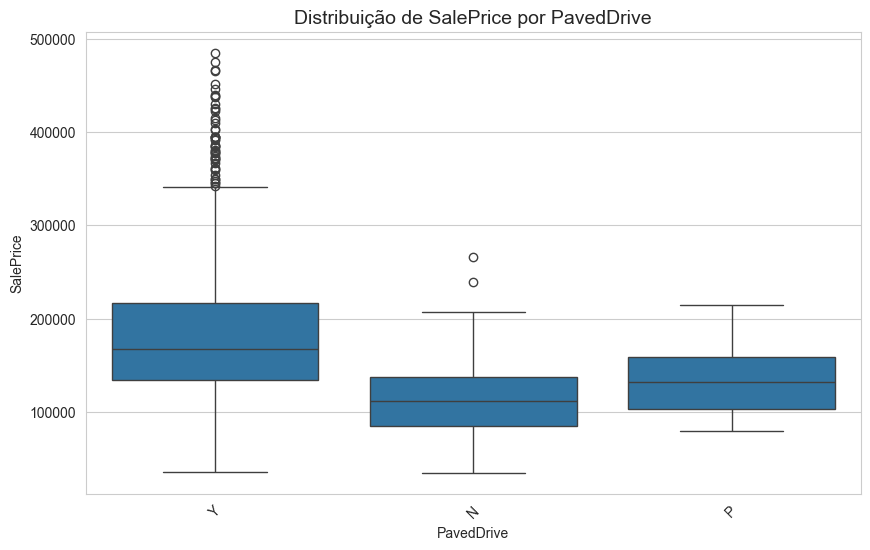

In [25]:
df_tratado_cat = df_selecionado.copy()

# Removendo os mesmos outliers usados em df_tratado
df_tratado_cat = df_tratado_cat[df_tratado_cat['GrLivArea'] < 4000].copy()
df_tratado_cat = df_tratado_cat[df_tratado_cat['SalePrice'] < 500000].copy()
df_tratado_cat = df_tratado_cat[df_tratado_cat['LotFrontage'] < 150].copy()

print(f"Formato final (com categorias e sem outliers): {df_tratado_cat.shape}")

cat_cols = df_tratado_cat.select_dtypes(include=['object']).columns  # só as categóricas

for col in cat_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df_tratado_cat[col], y=df_tratado_cat['SalePrice'])
    plt.title(f'Distribuição de SalePrice por {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()


### 4.4 Interação entre GrLivArea e OverallQual</h2>
<p>
Analisamos como a área de estar (GrLivArea) e a qualidade geral (OverallQual) 
combinadas influenciam o preço de venda.
</p>

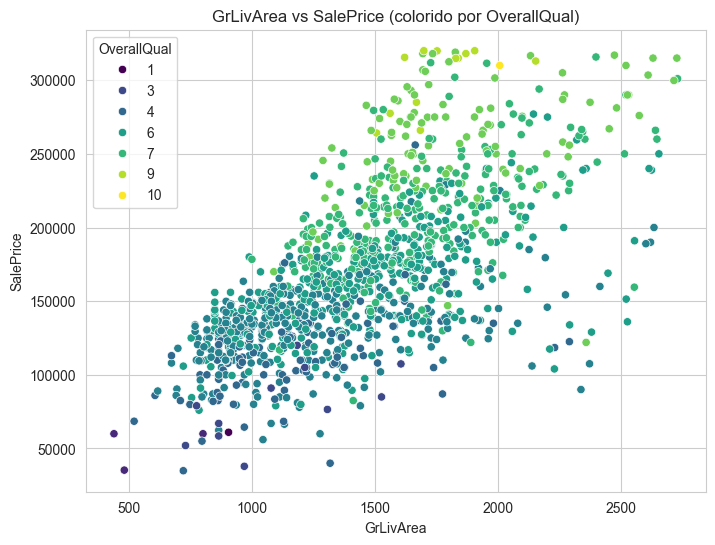

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="OverallQual", data=df_eda, palette="viridis")
plt.title("GrLivArea vs SalePrice (colorido por OverallQual)")
plt.show()

### 4.5 Tendência de Preço ao Longo do Tempo</h2>
<p>
Exploramos como o preço de venda varia de acordo com o ano de construção, 
destacando períodos com imóveis mais valorizados.
</p>

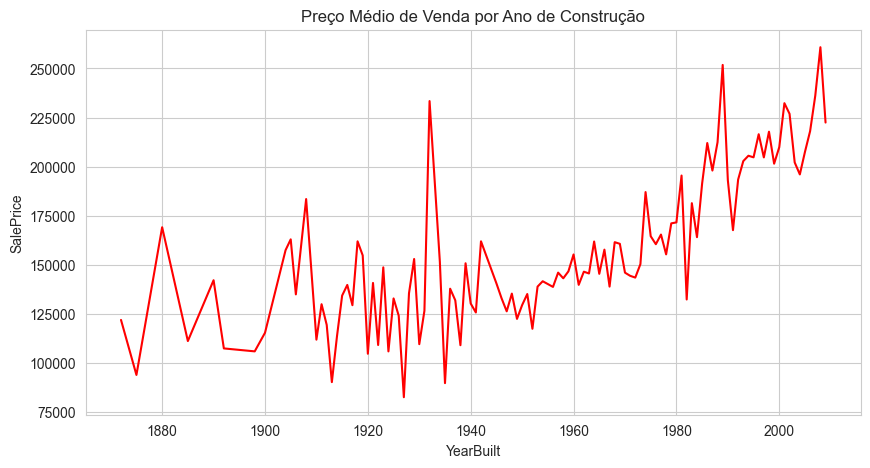

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(x="YearBuilt", y="SalePrice", data=df_eda.groupby("YearBuilt", as_index=False)["SalePrice"].mean(), color="red")
plt.title("Preço Médio de Venda por Ano de Construção")
plt.show()

---
## 5. Modelagem Preditiva</h1>
<p>
Nesta etapa, utilizamos os dados tratados e explorados para treinar modelos de regressão 
e prever o preço de venda (SalePrice). 
Comparamos diferentes algoritmos e avaliamos desempenho com métricas adequadas.
</p>

### 5.1 Preparação dos Dados</h2>
<p>
Preparação do dataset: cópia dos dados tratados, aplicação de One-Hot Encoding nas variáveis categóricas, separação de features e target, divisão em treino/teste e escalonamento para Linear Regression.
</p>

In [31]:
df_modelo = df_tratado.copy()  # DataFrame já tratado (outliers removidos)
df_modelo = pd.get_dummies(df_modelo, drop_first=True)  # One-Hot Encoding

X = df_modelo.drop("SalePrice", axis=1)
y = np.log1p(df_modelo["SalePrice"])  # log-transform

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalar variáveis numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Dados preparados para modelagem")

✅ Dados preparados para modelagem


### 5.2 Regressão Linear
<p>Treinamento do modelo de Regressão Linear, previsão no conjunto de teste e cálculo das métricas RMSE e R².</p>

In [32]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression -> RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")

Linear Regression -> RMSE: 0.15, R²: 0.82


### 5.3 Random Forest Regressor
Treinamento do modelo de Random Forest Regressor, previsão no conjunto de teste e cálculo das métricas RMSE e R².</p>

In [35]:
rf_model = RandomForestRegressor(
    n_estimators=200, random_state=42
)
rf_model.fit(X_train, y_train)  # RF não precisa de escala

y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest -> RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")

Random Forest -> RMSE: 0.16, R²: 0.80


### 5.4 Importância das Features (Random Forest)
<p>Análise das 15 variáveis mais importantes para o modelo de Random Forest, com gráfico de barras para visualização.</p>

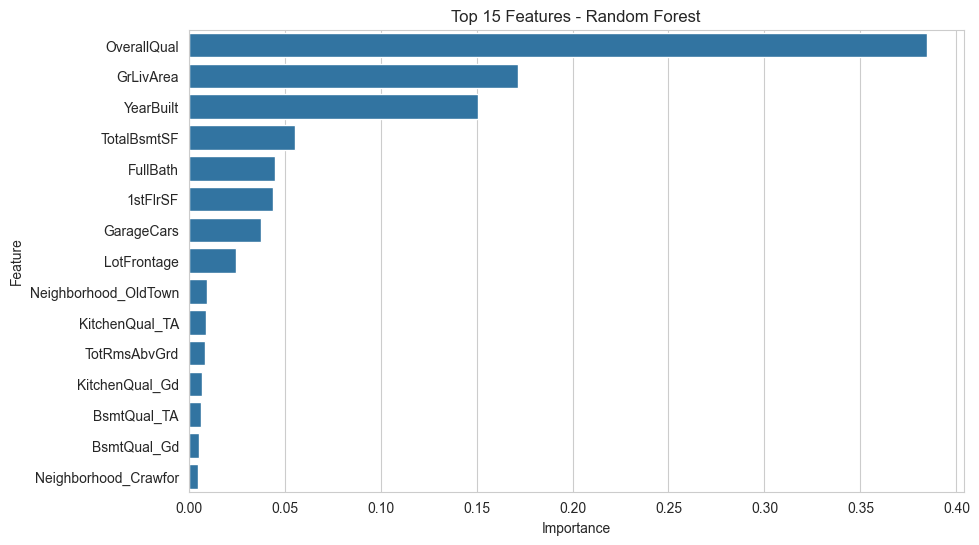

In [36]:
importances = rf_model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Top 15 Features - Random Forest")
plt.show()

### 5.5 Previsão em Novas Casas
<p>Criação de novas amostras de casas, preenchimento automático das colunas dummy, aplicação da escala e previsão dos preços pelos modelos treinados (Linear Regression e Random Forest).</p>

In [76]:
import pandas as pd
import numpy as np

# Exemplo de novas casas
novas_casas = [
    {'OverallQual': 9, 'GrLivArea': 2500, 'GarageCars': 2, 'TotalBsmtSF': 1500, '1stFlrSF': 1200, 'FullBath': 2, 'TotRmsAbvGrd': 7, 'Neighborhood_NridgHt':1},
    {'OverallQual': 6, 'GrLivArea': 1400, 'GarageCars': 1, 'TotalBsmtSF': 900, '1stFlrSF': 900, 'FullBath': 1, 'TotRmsAbvGrd': 5, 'Neighborhood_OldTown':1},
    {'OverallQual': 7, 'GrLivArea': 1800, 'GarageCars': 2, 'TotalBsmtSF': 1100, '1stFlrSF': 1100, 'FullBath': 2, 'TotRmsAbvGrd': 6}  # menos informações
]

def prever_varias_casas(lista_casas):
    resultados = []

    for casa in lista_casas:
        nova_casa = pd.DataFrame([casa])

        
        for col in X.columns:
            if col not in nova_casa.columns:
                nova_casa[col] = 0
        nova_casa = nova_casa[X.columns]  

        # 🔹 Limitar valores numéricos à faixa do treino
        num_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd']
        for col in num_cols:
            min_val = X_train[col].min()
            max_val = X_train[col].max()
            nova_casa[col] = nova_casa[col].clip(lower=min_val, upper=max_val)

        # 🔹 Linear Regression: escalar colunas numéricas
        nova_casa_scaled = scaler.transform(nova_casa)

        # 🔹 Previsão Linear Regression
        preco_pred_lr = np.expm1(lr_model.predict(nova_casa_scaled))

        # 🔹 Previsão Random Forest
        preco_pred_rf = np.expm1(rf_model.predict(nova_casa))

        # 🔹 Adicionar previsões ao DataFrame
        nova_casa['Preco_LR'] = preco_pred_lr
        nova_casa['Preco_RF'] = preco_pred_rf

        # 🔹 Formatar preços em dólar
        nova_casa['Preco_LR'] = nova_casa['Preco_LR'].apply(lambda x: f"${x:,.2f}")
        nova_casa['Preco_RF'] = nova_casa['Preco_RF'].apply(lambda x: f"${x:,.2f}")

        resultados.append(nova_casa)

    df_resultados = pd.concat(resultados, ignore_index=True)
    return df_resultados

# ------------------------------
# Prever todas as casas
# ------------------------------
df_previsoes = prever_varias_casas(novas_casas)

# ------------------------------
# Mostrar resultados principais
# ------------------------------
display(df_previsoes[['OverallQual','GrLivArea','GarageCars','Preco_LR','Preco_RF']])

,OverallQual,GrLivArea,GarageCars,Preco_LR,Preco_RF
0,9,2500,2,"$10,345.24","$253,874.75"
1,6,1400,1,"$5,242.94","$122,606.69"
2,7,1800,2,"$6,488.18","$185,131.90"


### Conclusão:
Foram utilizadas Regressão Linear e Random Forest para prever os preços das casas. A regressão linear modela os preços assumindo uma relação linear entre as variáveis, o que pode subestimar valores quando há efeitos não lineares ou interações complexas. Já o Random Forest combina múltiplas árvores de decisão, capturando relações não lineares e interações entre variáveis, resultando em previsões mais realistas, como pôde ser observado na previsão dos preços das três casas dadas no tópico 5.5